In [29]:
#import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from transformers import pipeline
from googletrans import Translator
import spacy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix


In [30]:
df = pd.read_csv('test_4.csv')

In [31]:
df.shape

(1000, 6)

In [32]:
df.describe

<bound method NDFrame.describe of                                          DealerComment  \
0    * ******************************SKARGA********...   
1    ******************************REKL************...   
2    ******************************Klgomål*********...   
3    ******************************REKL************...   
4    ******************************INCIDENT********...   
..                                                 ...   
995  * ******************************SKARGA********...   
996  ******************************SICAYET*********...   
997  * ******************************SKARGA********...   
998  * ******************************REKL**********...   
999  * ******************************TIPO_DANNO****...   

                     Component                Failure     DefectivePart  \
0                     BEARINGS                  NOISE    WHEEL BEARINGS   
1                  RAIN SENSOR   INCORRECT ADJUSTMENT            SENSOR   
2                    EGR VALVE            WA

In [33]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DealerComment  1000 non-null   object 
 1   Component      1000 non-null   object 
 2   Failure        1000 non-null   object 
 3   DefectivePart  1000 non-null   object 
 4   PartsReplaced  1000 non-null   float64
 5   Cost           1000 non-null   float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [34]:
#to check columns
df.columns

Index(['DealerComment', 'Component', 'Failure', 'DefectivePart',
       'PartsReplaced', 'Cost'],
      dtype='object')

In [35]:
#to check the first five rows
df.head()

,DealerComment,Component,Failure,DefectivePart,PartsReplaced,Cost
0,* ******************************SKARGA********...,BEARINGS,NOISE,WHEEL BEARINGS,5.0,299.776842
1,******************************REKL************...,RAIN SENSOR,INCORRECT ADJUSTMENT,SENSOR,1.0,67.360000
2,******************************Klgomål*********...,EGR VALVE,WATER LEAKS,EGR VALVE,1.0,1106.880000
3,******************************REKL************...,BRAKE CALIPER,BLOCKAGE,BRAKE SADDLE,1.5,443.450000
4,******************************INCIDENT********...,SLEEVES,BREAK,RUBBER SLEEVE,1.0,153.130000


In [36]:
#tranlating the english column in dealer_comment
translator = Translator()
def translate_text(text):
    return translator.translate(text, dest='en').text

In [37]:
df['Translated_DealerComment'] = df['DealerComment'].apply(translate_text)

In [38]:
df['DealerComment'] = df['DealerComment'].str.replace('*', '', regex=False).str.replace('_', ' ', regex=False)

In [39]:
df['Translated_DealerComment'] = df['Translated_DealerComment'].str.replace('*', '', regex=False).str.replace('_', ' ', regex=False)

In [43]:
df.head()

,DealerComment,Component,Failure,DefectivePart,PartsReplaced,Cost,Translated_DealerComment
0,SKARGA HALAS Z PRZODU POJAZDU PODCZAS JAZDY ...,BEARINGS,NOISE,WHEEL BEARINGS,5.0,299.776842,COMPLAINT NOISE FROM THE FRONT OF THE VEHICL...
1,REKL Fehler Regensenor GRUND Regensensor defek...,RAIN SENSOR,INCORRECT ADJUSTMENT,SENSOR,1.0,67.360000,REKL Rain sensor error REASON Rain sensor de...
2,Klgomål FELSÖKNING: BILEN DRAR KYLARVÄTSKA Ors...,EGR VALVE,WATER LEAKS,EGR VALVE,1.0,1106.880000,Goals TROUBLESHOOTING: THE CAR DRAWS COOLANT ...
3,REKL Vorderachsbremse rechts wird heiss. GRUND...,BRAKE CALIPER,BLOCKAGE,BRAKE SADDLE,1.5,443.450000,REKL Front axle brake on the right is getting...
4,INCIDENT PERTE PUISSANCE \nBRUIT A L ACCELERAT...,SLEEVES,BREAK,RUBBER SLEEVE,1.0,153.130000,INCIDENT POWER LOSS \nNOISE DURING ACCELERATI...


In [ ]:
# components = df['Component'].dropna().unique().tolist()
# defective_parts = df['DefectivePart'].dropna().unique().tolist()
# failure_types = df['Failure'].dropna().unique().tolist()
# parts_replaced = df['PartsReplaced'].dropna().unique().tolist()
# cost_occured = df['Cost'].dropna().unique().tolist()

# # Load the spaCy English model
# nlp = spacy.load("en_core_web_sm")

# # Create a custom entity ruler
# ruler = nlp.add_pipe("entity_ruler", before="ner")

# def create_patterns(label, values):
#     return [{"label": label, "pattern": [{"LOWER": str(value).lower()}]} for value in values]

# # Create patterns for each type of information
# component_patterns = create_patterns("DEFECTIVE_COMPONENT", components)
# defective_part_patterns = create_patterns("DEFECTIVE_PART", defective_parts)
# failure_patterns = create_patterns("FAILURE_TYPE", failure_types)

# # Convert parts_replaced to strings and filter out non-string values
# parts_replaced = [str(part) for part in parts_replaced if isinstance(part, (int, float)) or isinstance(part, str)]
# No_of_parts = create_patterns("NUM_PARTS_REPLACED", parts_replaced)

# # Convert cost_occured to strings and filter out non-string values
# cost_occured = [str(cost) for cost in cost_occured if isinstance(cost, (int, float)) or isinstance(cost, str)]
# Total_Cost = create_patterns("COST", cost_occured)

# # Add patterns for cause of failure types
# cause_of_failure_patterns = create_patterns("CAUSE_OF_FAILURE", ["material issue", "human error", "design flaw"])

# # Add all patterns to the entity ruler
# ruler.add_patterns(component_patterns)
# ruler.add_patterns(defective_part_patterns)
# ruler.add_patterns(failure_patterns)
# ruler.add_patterns(No_of_parts)
# ruler.add_patterns(Total_Cost)
# ruler.add_patterns(cause_of_failure_patterns)

# # Example function to extract entities
# def extract_entities(text):
#     doc = nlp(text)
#     extracted_info = {ent.label_: ent.text for ent in doc.ents}
#     return extracted_info

In [ ]:
# df['extracted_entities'] = df['Translated_DealerComment'].apply(lambda x: extract_entities(x) if pd.notna(x) else {})

# # Split extracted entities into separate columns
# df['defective_component'] = df['extracted_entities'].apply(lambda x: x.get("DEFECTIVE_COMPONENT", "N/A"))
# df['defective_part'] = df['extracted_entities'].apply(lambda x: x.get("DEFECTIVE_PART", "N/A"))
# df['failure_type'] = df['extracted_entities'].apply(lambda x: x.get("FAILURE_TYPE", "N/A"))
# df['num_parts_replaced'] = df['extracted_entities'].apply(lambda x: x.get("NUM_PARTS_REPLACED", "N/A"))
# df['total_cost'] = df['extracted_entities'].apply(lambda x: x.get("COST", "N/A"))
# df['cause_of_failure'] = df['extracted_entities'].apply(lambda x: x.get("CAUSE_OF_FAILURE", "N/A"))

# # Preview extracted information
# print(df[['Translated_DealerComment', 'defective_component', 'defective_part', 'failure_type', 'num_parts_replaced', 'total_cost', 'cause_of_failure']].head())

# # Optional: Save to a new CSV file
# df.to_csv('extracted_entities.csv', index=False)

                            Translated_DealerComment defective_component  \
0   COMPLAINT  NOISE FROM THE FRONT OF THE VEHICL...                 N/A   
1  REKL  Rain sensor error  REASON Rain sensor de...              sensor   
2  Goals  TROUBLESHOOTING: THE CAR DRAWS COOLANT ...               HOSES   
3  REKL  Front axle brake on the right is getting...                 N/A   
4  INCIDENT  POWER LOSS \nNOISE DURING ACCELERATI...                 N/A   

  defective_part failure_type num_parts_replaced total_cost cause_of_failure  
0            N/A   ADJUSTMENT                N/A        N/A              N/A  
1         Sensor          N/A                N/A        N/A              N/A  
2              .          N/A                N/A        N/A              N/A  
3              .          N/A                N/A        N/A              N/A  
4           HOSE        NOISE                N/A        N/A              N/A  


In [ ]:
# import pandas as pd
# import spacy



# # Get unique values for each feature after removing NaN values
# components = df['Component'].dropna().unique().tolist()
# defective_parts = df['DefectivePart'].dropna().unique().tolist()
# failure_types = df['Failure'].dropna().unique().tolist()
# parts_replaced = df['PartsReplaced'].dropna().unique().tolist()
# cost_occured = df['Cost'].dropna().unique().tolist()

# # Load the spaCy English model
# nlp = spacy.load("en_core_web_sm")

# # Create a custom entity ruler
# ruler = nlp.add_pipe("entity_ruler", before="ner")

# # Function to create patterns
# def create_patterns(label, values):
#     return [{"label": label, "pattern": [{"LOWER": str(value).lower()}]} for value in values]

# # Create patterns for each type of information
# component_patterns = create_patterns("DEFECTIVE_COMPONENT", components)
# defective_part_patterns = create_patterns("DEFECTIVE_PART", defective_parts)
# failure_patterns = create_patterns("FAILURE_TYPE", failure_types)
# parts_replaced = [str(part) for part in parts_replaced if isinstance(part, (int, float)) or isinstance(part, str)]
# No_of_parts = create_patterns("NUM_PARTS_REPLACED", parts_replaced)
# cost_occured = [str(cost) for cost in cost_occured if isinstance(cost, (int, float)) or isinstance(cost, str)]
# Total_Cost = create_patterns("COST", cost_occured)



# # Add all patterns to the entity ruler
# ruler.add_patterns(component_patterns)
# ruler.add_patterns(defective_part_patterns)
# ruler.add_patterns(failure_patterns)
# ruler.add_patterns(No_of_parts)
# ruler.add_patterns(Total_Cost)
# ruler.add_patterns(cause_of_failure_patterns)

# # Function to extract entities from text
# def extract_entities(text):
#     doc = nlp(text)
#     return {ent.label_: ent.text for ent in doc.ents}

# # Apply entity extraction to the 'Translated_DealerComment' column
# df['extracted_entities'] = df['Translated_DealerComment'].apply(lambda x: extract_entities(x) if pd.notna(x) else {})

# # Split extracted entities into separate columns
# df['defective_component'] = df['extracted_entities'].apply(lambda x: x.get("DEFECTIVE_COMPONENT", "N/A"))
# df['defective_part'] = df['extracted_entities'].apply(lambda x: x.get("DEFECTIVE_PART", "N/A"))
# df['failure_type'] = df['extracted_entities'].apply(lambda x: x.get("FAILURE_TYPE", "N/A"))
# df['num_parts_replaced'] = df['extracted_entities'].apply(lambda x: x.get("NUM_PARTS_REPLACED", "N/A"))
# df['total_cost'] = df['extracted_entities'].apply(lambda x: x.get("COST", "N/A"))
# df['cause_of_failure'] = df['extracted_entities'].apply(lambda x: x.get("CAUSE_OF_FAILURE"))

# # Preview extracted information
# print(df[['Translated_DealerComment', 'defective_component', 'defective_part', 'failure_type', 'num_parts_replaced', 'total_cost', 'cause_of_failure']].head())

# # Optional: Save to a new CSV file
# df.to_csv('extracted_entities.csv', index=False)


                            Translated_DealerComment defective_component  \
0   COMPLAINT  NOISE FROM THE FRONT OF THE VEHICL...                 N/A   
1  REKL  Rain sensor error  REASON Rain sensor de...              sensor   
2  Goals  TROUBLESHOOTING: THE CAR DRAWS COOLANT ...               HOSES   
3  REKL  Front axle brake on the right is getting...                 N/A   
4  INCIDENT  POWER LOSS \nNOISE DURING ACCELERATI...                 N/A   

  defective_part failure_type num_parts_replaced total_cost cause_of_failure  
0            N/A   ADJUSTMENT                N/A        N/A             None  
1         Sensor          N/A                N/A        N/A             None  
2              .          N/A                N/A        N/A             None  
3              .          N/A                N/A        N/A             None  
4           HOSE        NOISE                N/A        N/A             None  


In [14]:
# Initialize the zero-shot classification using pipeline
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="Jiva/xlm-roberta-large-it-mnli")
cause_labels = ['Human_Error','Design_Flaws','Material_Issue']


In [15]:
def classify_cause(text):
    result = classifier(text, cause_labels)
    return result['labels'][0]

In [16]:
df['Cause_of_Failure'] = df['Translated_DealerComment'].apply(classify_cause)

In [17]:
for cause in cause_labels:
    df[cause] = df['Cause_of_Failure'].apply(lambda x: 1 if x == cause else 0)
    print(cause)

Human_Error
Design_Flaws
Material_Issue


In [18]:
print(cause_labels)

['Human_Error', 'Design_Flaws', 'Material_Issue']


In [19]:
cause_distribution = df['Cause_of_Failure'].value_counts(normalize=True)
print("\nDistribution of Components_Failure:")
print(cause_distribution)


Distribution of Components_Failure:
Cause_of_Failure
Material_Issue    0.505
Design_Flaws      0.485
Human_Error       0.010
Name: proportion, dtype: float64


In [21]:
df.to_csv("final_test.csv",index=False)

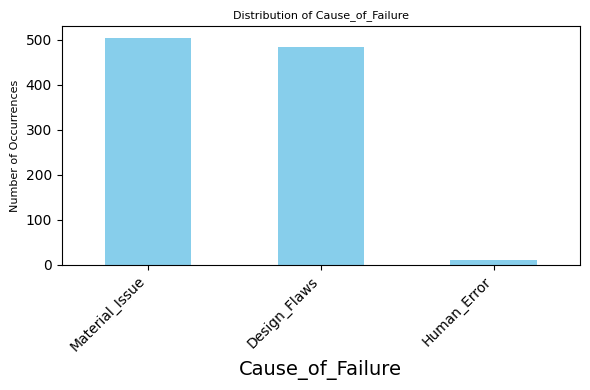

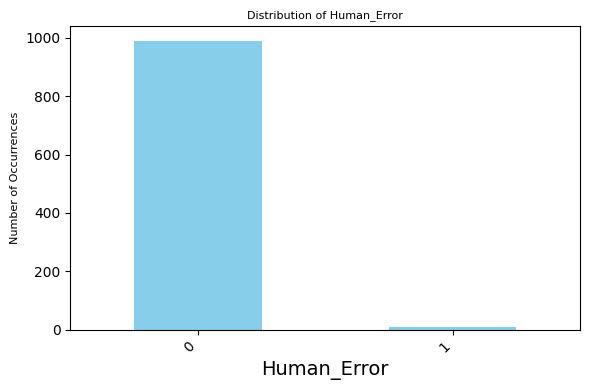

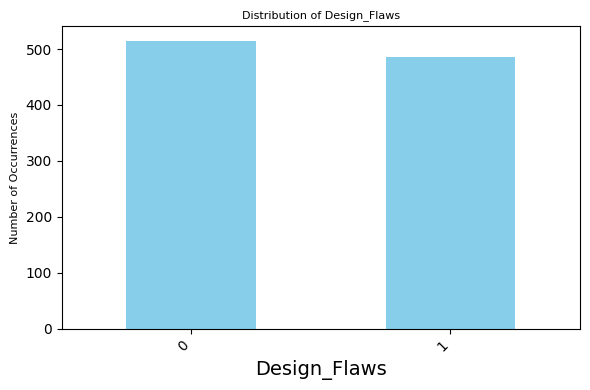

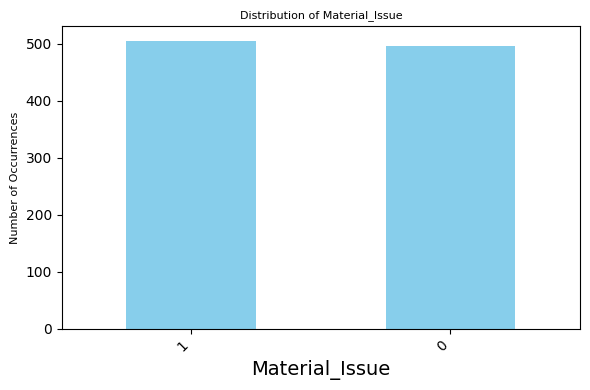

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'final_test.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# List of columns to analyze
analyze = ['Cause_of_Failure','Human_Error','Design_Flaws','Material_Issue']

# Loop through each column and plot its distribution
for column in analyze:
    plt.figure(figsize=(6, 4))
    # Count occurrences of each value in the column
    value_counts = df[column].value_counts()
    
    # Plot the distribution
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=8)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Number of Occurrences', fontsize=8)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Show each plot
    plt.show()


In [ ]:
# from transformers import pipeline
# import pandas as pd

# # Load the zero-shot classification pipeline
# classifier = pipeline("zero-shot-classification", model="Jiva/xlm-roberta-large-it-mnli")

# # Define candidate labels, including specific causes of failure
# candidate_labels = [
#     "DEFECTIVE_COMPONENT", "DEFECTIVE_PART", "FAILURE_TYPE", 
#     "NUM_PARTS_REPLACED", "COST", 
#     "Material issue", "Human error", "Design flaw"
# ]

# # Function to perform zero-shot classification
# def zero_shot_extract(text):
#     if pd.isna(text):
#         return {}
#     result = classifier(text, candidate_labels)
#     extracted_info = {label: text for label, score in zip(result['labels'], result['scores']) if score > 0.5}
#     return extracted_info

# # Apply zero-shot classification to extract entities
# df['extracted_entities'] = df['Translated_DealerComment'].apply(zero_shot_extract)

# # Split extracted entities into separate columns
# df['defective_component'] = df['extracted_entities'].apply(lambda x: x.get("DEFECTIVE_COMPONENT", "N/A"))
# df['defective_part'] = df['extracted_entities'].apply(lambda x: x.get("DEFECTIVE_PART", "N/A"))
# df['failure_type'] = df['extracted_entities'].apply(lambda x: x.get("FAILURE_TYPE", "N/A"))
# df['num_parts_replaced'] = df['extracted_entities'].apply(lambda x: x.get("NUM_PARTS_REPLACED", "N/A"))
# df['total_cost'] = df['extracted_entities'].apply(lambda x: x.get("COST", "N/A"))

# # Extract cause of failure by checking specific labels
# df['cause_of_failure'] = df['extracted_entities'].apply(lambda x: 
#     "Material issue" if "Material issue" in x else
#     "Human error" if "Human error" in x else
#     "Design flaw" if "Design flaw" in x else
#     "N/A"
# )

# # Preview extracted information
# print(df[['Translated_DealerComment', 'defective_component', 'defective_part', 'failure_type', 'num_parts_replaced', 'total_cost', 'cause_of_failure']].head())



                            Translated_DealerComment defective_component  \
0   COMPLAINT  NOISE FROM THE FRONT OF THE VEHICL...                 N/A   
1  REKL  Rain sensor error  REASON Rain sensor de...                 N/A   
2  Goals  TROUBLESHOOTING: THE CAR DRAWS COOLANT ...                 N/A   
3  REKL  Front axle brake on the right is getting...                 N/A   
4  INCIDENT  POWER LOSS \nNOISE DURING ACCELERATI...                 N/A   

  defective_part failure_type num_parts_replaced total_cost cause_of_failure  
0            N/A          N/A                N/A        N/A              N/A  
1            N/A          N/A                N/A        N/A              N/A  
2            N/A          N/A                N/A        N/A              N/A  
3            N/A          N/A                N/A        N/A              N/A  
4            N/A          N/A                N/A        N/A              N/A  


PermissionError: [Errno 13] Permission denied: 'extracted_entities.csv'

In [54]:
# Optional: Save to a new CSV file
df.to_csv('extracted_entities1.csv', index=False)


In [55]:
df = pd.read_csv('extracted_entities1.csv')

In [56]:
df.head()

,DealerComment,Component,Failure,DefectivePart,PartsReplaced,Cost,Translated_DealerComment,extracted_entities,defective_component,defective_part,failure_type,num_parts_replaced,total_cost,cause_of_failure
0,SKARGA HALAS Z PRZODU POJAZDU PODCZAS JAZDY ...,BEARINGS,NOISE,WHEEL BEARINGS,5.0,299.776842,COMPLAINT NOISE FROM THE FRONT OF THE VEHICL...,{},NaN,NaN,NaN,NaN,NaN,NaN
1,REKL Fehler Regensenor GRUND Regensensor defek...,RAIN SENSOR,INCORRECT ADJUSTMENT,SENSOR,1.0,67.360000,REKL Rain sensor error REASON Rain sensor de...,{},NaN,NaN,NaN,NaN,NaN,NaN
2,Klgomål FELSÖKNING: BILEN DRAR KYLARVÄTSKA Ors...,EGR VALVE,WATER LEAKS,EGR VALVE,1.0,1106.880000,Goals TROUBLESHOOTING: THE CAR DRAWS COOLANT ...,{},NaN,NaN,NaN,NaN,NaN,NaN
3,REKL Vorderachsbremse rechts wird heiss. GRUND...,BRAKE CALIPER,BLOCKAGE,BRAKE SADDLE,1.5,443.450000,REKL Front axle brake on the right is getting...,{},NaN,NaN,NaN,NaN,NaN,NaN
4,INCIDENT PERTE PUISSANCE \nBRUIT A L ACCELERAT...,SLEEVES,BREAK,RUBBER SLEEVE,1.0,153.130000,INCIDENT POWER LOSS \nNOISE DURING ACCELERATI...,{},NaN,NaN,NaN,NaN,NaN,NaN
